# 1 Load Library

In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Xử lý thời gian và dữ liệu
from datetime import datetime
import pandas as pd
import numpy as np
import io

# Thống kê và phân tích
from scipy.stats import (chi2, chi2_contingency, zscore, ttest_1samp, ttest_ind, levene, kstest, mannwhitneyu, ttest_rel, norm, rankdata, kruskal, pearsonr, spearmanr, stats)
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pingouin as pg
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Vẽ biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns

# Làm việc với Google Sheets
import gspread
from gspread_dataframe import set_with_dataframe
from google.oauth2.service_account import Credentials
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

# Cài đặt hiển thị rộng hơn cho DataFrame
pd.set_option('display.width', 1200)  # Độ rộng tối đa
pd.set_option('display.max_columns', None)  # Hiển thị tất cả các cột
pd.set_option('display.max_rows', None)  # Hiển thị tất cả các hàng

Mounted at /content/drive


# 2 Read Data
Link Dataset: https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset/data
**văn bản in đậm**
About Data:
- Every bank wants to hold there customers for sustaining their business so the ABC Multinational bank.

- Below is the customer data of account holders at ABC Multinational Bank and the aim of the data will be predicting the Customer Churn.

In [ ]:
# File path to your .sav file
file_path = "/content/drive/My Drive/Colab Notebooks/Data/Bank Customer Churn Prediction.csv"

# Read the SPSS file
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
print(df.head())

   customer_id  credit_score country  gender  age  tenure    balance  products_number  credit_card  active_member  estimated_salary  churn
0     15634602           619  France  Female   42       2       0.00                1            1              1         101348.88      1
1     15647311           608   Spain  Female   41       1   83807.86                1            0              1         112542.58      0
2     15619304           502  France  Female   42       8  159660.80                3            1              0         113931.57      1
3     15701354           699  France  Female   39       1       0.00                2            0              0          93826.63      0
4     15737888           850   Spain  Female   43       2  125510.82                1            1              1          79084.10      0


# 3 Data Wrangling

In [ ]:
# Encoding Categorical Columns
df_encoding = df.copy()

In [ ]:
categorical_columns=df_encoding.select_dtypes(include='object').columns
encoder = LabelEncoder()
for col in categorical_columns:
    df_encoding[col]=encoder.fit_transform(df_encoding[col])

In [ ]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  int64  
 3   gender            10000 non-null  int64  
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [ ]:
print(df_encoding.head())

   customer_id  credit_score  country  gender  age  tenure    balance  products_number  credit_card  active_member  estimated_salary  churn
0     15634602           619        0       0   42       2       0.00                1            1              1         101348.88      1
1     15647311           608        2       0   41       1   83807.86                1            0              1         112542.58      0
2     15619304           502        0       0   42       8  159660.80                3            1              0         113931.57      1
3     15701354           699        0       0   39       1       0.00                2            0              0          93826.63      0
4     15737888           850        2       0   43       2  125510.82                1            1              1          79084.10      0


#4 Explore Data Analysis

In [ ]:
print(df.describe())

        customer_id  credit_score           age        tenure        balance  products_number  credit_card  active_member  estimated_salary         churn
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000     10000.000000  10000.00000   10000.000000      10000.000000  10000.000000
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288         1.530200      0.70550       0.515100     100090.239881      0.203700
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202         0.581654      0.45584       0.499797      57510.492818      0.402769
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000         1.000000      0.00000       0.000000         11.580000      0.000000
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000         1.000000      0.00000       0.000000      51002.110000      0.000000
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000

In [ ]:
print(df_encoding.describe())

        customer_id  credit_score       country        gender           age        tenure        balance  products_number  credit_card  active_member  estimated_salary         churn
count  1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000     10000.000000  10000.00000   10000.000000      10000.000000  10000.000000
mean   1.569094e+07    650.528800      0.746300      0.545700     38.921800      5.012800   76485.889288         1.530200      0.70550       0.515100     100090.239881      0.203700
std    7.193619e+04     96.653299      0.827529      0.497932     10.487806      2.892174   62397.405202         0.581654      0.45584       0.499797      57510.492818      0.402769
min    1.556570e+07    350.000000      0.000000      0.000000     18.000000      0.000000       0.000000         1.000000      0.00000       0.000000         11.580000      0.000000
25%    1.562853e+07    584.000000      0.000000      0.000000     32.000000      3.000000 

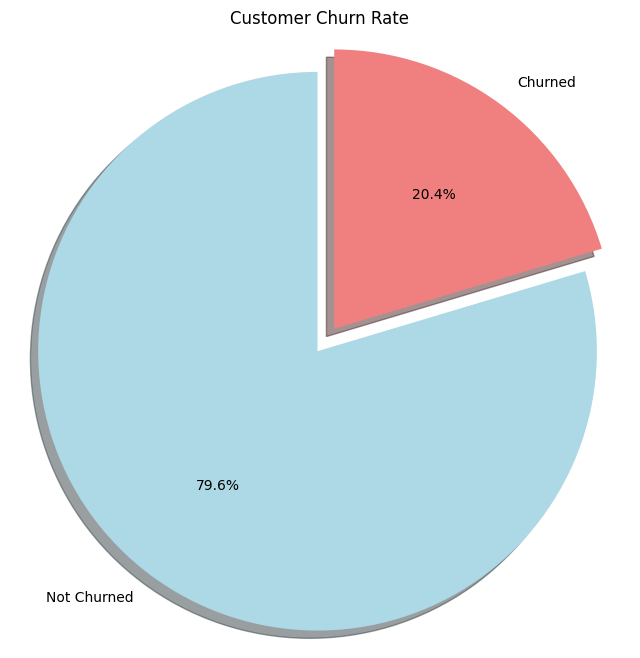

In [ ]:
# Assuming 'df' is your DataFrame and 'Exited' is the churn column (1 for churned, 0 for not churned)
churn_counts = df['churn'].value_counts()
labels = ['Not Churned', 'Churned']
sizes = churn_counts.values
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the 'Churned' slice

plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Customer Churn Rate')
plt.show()

Approximately 20.4% of customers have churn.


<ipython-input-13-404af6523604>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{rate:.2%}', (i, churn_counts['Total'][i]), ha='center', va='bottom')


<Figure size 1200x600 with 0 Axes>

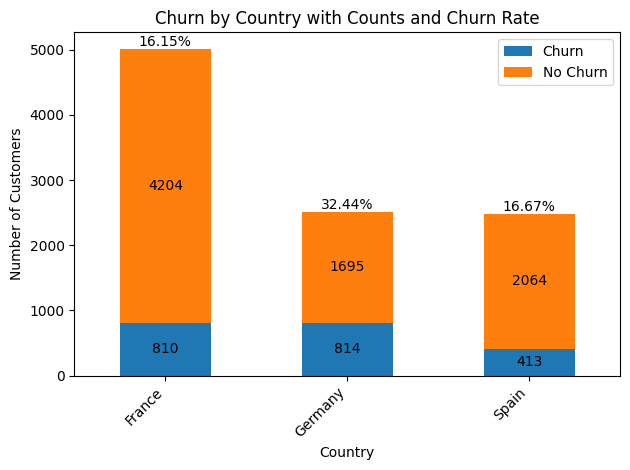

In [ ]:
# Calculate churn counts and rates
churn_counts = df.groupby('country')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns for clarity
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'}) # Rename columns 0 and 1 to "No Churn" and "Churn"

# Create the plot
plt.figure(figsize=(12, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add churn rate annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

# Add churn rate annotations
for i, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (i, churn_counts['Total'][i]), ha='center', va='bottom')

plt.title('Churn by Country with Counts and Churn Rate')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()

Germany has the highest customer churn rate at 32.44%.



<ipython-input-14-564baf3a7c3f>:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.annotate(f'{rate:.2%}', (i, churn_counts['Total'][i]), ha='center', va='bottom')


<Figure size 1200x600 with 0 Axes>

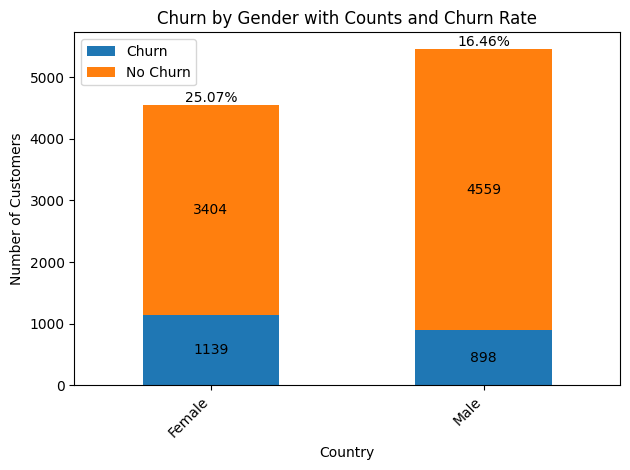

In [ ]:
# Calculate churn counts and rates
churn_counts = df.groupby('gender')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns for clarity
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'}) # Rename columns 0 and 1 to "No Churn" and "Churn"

# Create the plot
plt.figure(figsize=(12, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add churn rate annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

# Add churn rate annotations
for i, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (i, churn_counts['Total'][i]), ha='center', va='bottom')

plt.title('Churn by Gender with Counts and Churn Rate')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()

Females have the highest customer churn rate at 25.07%

<ipython-input-15-3679cd5c424c>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

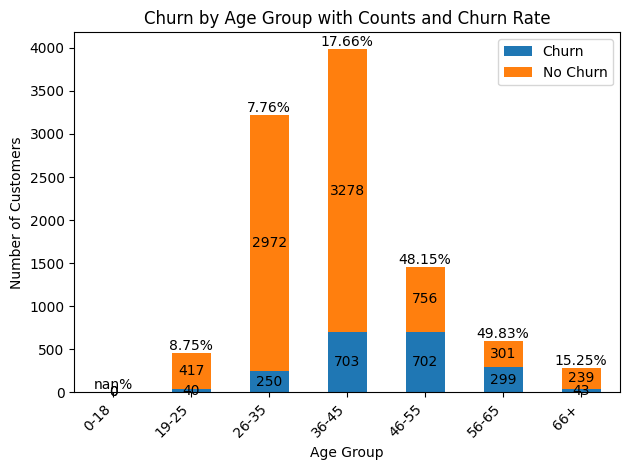

In [ ]:
# Define age group bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, float('inf')]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Create a new 'age_group' column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Calculate churn counts and rates by age group
churn_counts = df.groupby('age_group')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'})

# Create the plot
plt.figure(figsize=(12, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

for index, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (index, churn_counts.loc[churn_counts.index[index], 'Total']), ha='center', va='bottom')

plt.title('Churn by Age Group with Counts and Churn Rate')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()

The older the age, the higher the customer churn rate.

<ipython-input-16-eb57073837e7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby('credit_score_group')['churn'].value_counts().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

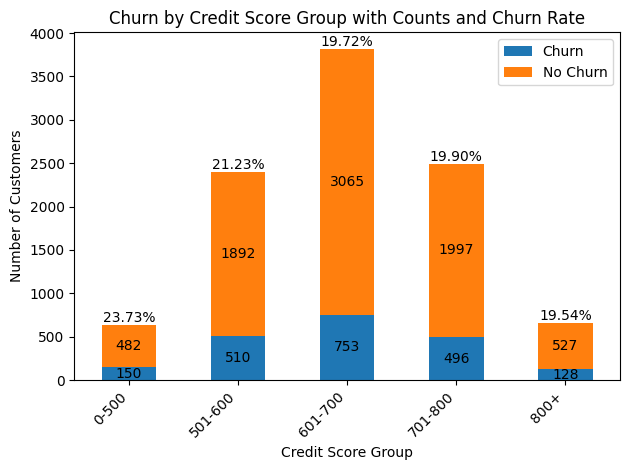

In [ ]:
# Group credit_score into ranges for better visualization
bins = [0, 500, 600, 700, 800, float('inf')]
labels = ['0-500', '501-600', '601-700', '701-800', '800+']
df['credit_score_group'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=False)

# Calculate churn counts and rates by credit score group
churn_counts = df.groupby('credit_score_group')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'})

# Create the plot
plt.figure(figsize=(12, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

for index, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (index, churn_counts.loc[churn_counts.index[index], 'Total']), ha='center', va='bottom')

plt.title('Churn by Credit Score Group with Counts and Churn Rate')
plt.xlabel('Credit Score Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()


<ipython-input-17-4de90ba2c131>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

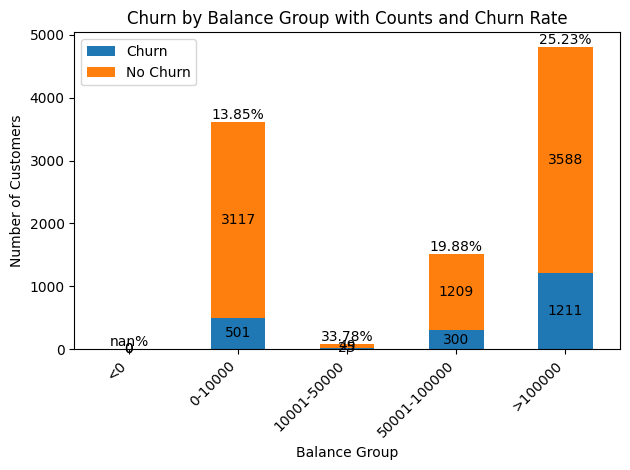

In [ ]:
# Calculate churn counts and rates for 'balance'
# Group balance into ranges for better visualization
bins = [-float('inf'), 0, 10000, 50000, 100000, float('inf')]
labels = ['<0', '0-10000', '10001-50000', '50001-100000', '>100000']
df['balance_group'] = pd.cut(df['balance'], bins=bins, labels=labels, right=False)

churn_counts = df.groupby('balance_group')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'})

# Create the plot
plt.figure(figsize=(12, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

for index, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (index, churn_counts.loc[churn_counts.index[index], 'Total']), ha='center', va='bottom')

plt.title('Churn by Balance Group with Counts and Churn Rate')
plt.xlabel('Balance Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

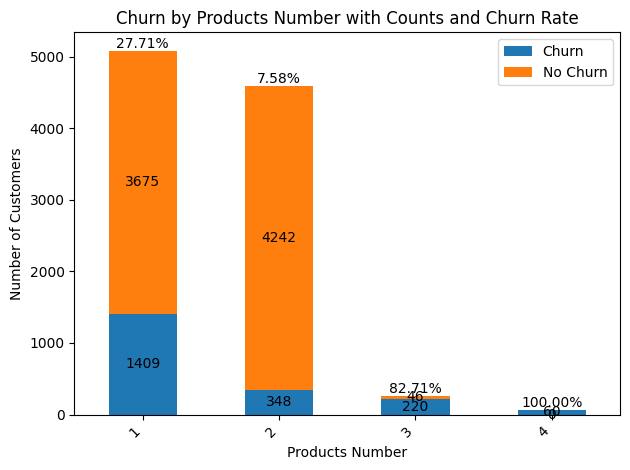

In [ ]:
# Calculate churn counts and rates for 'products_number'
churn_counts = df.groupby('products_number')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'})

# Create the plot
plt.figure(figsize=(12, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

for index, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (index, churn_counts.loc[churn_counts.index[index], 'Total']), ha='center', va='bottom')

plt.title('Churn by Products Number with Counts and Churn Rate')
plt.xlabel('Products Number')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()

The more products a customer has, the higher the churn rate

<Figure size 800x600 with 0 Axes>

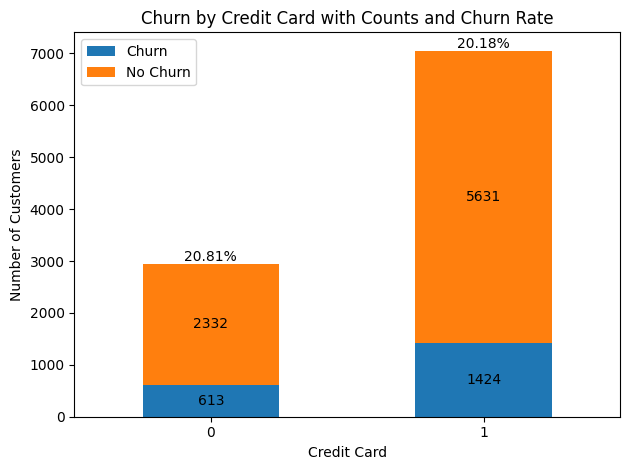

In [ ]:
# Calculate churn counts and rates for 'credit_card'
churn_counts = df.groupby('credit_card')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'})

# Create the plot
plt.figure(figsize=(8, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add annotations for counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

# Add annotations for churn rates
for i, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (i, churn_counts['Total'][i]), ha='center', va='bottom')

plt.title('Churn by Credit Card with Counts and Churn Rate')
plt.xlabel('Credit Card')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # No rotation for x-axis labels
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()

There is no difference in the churn rate between customers with and without a credit card.

<Figure size 800x600 with 0 Axes>

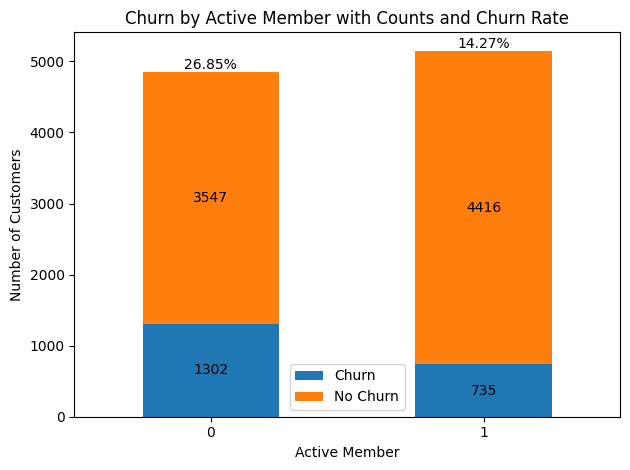

In [ ]:
# Calculate churn counts and rates for 'active_member'
churn_counts = df.groupby('active_member')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'})

# Create the plot
plt.figure(figsize=(8, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add annotations for counts
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

# Add annotations for churn rates
for i, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (i, churn_counts['Total'][i]), ha='center', va='bottom')

plt.title('Churn by Active Member with Counts and Churn Rate')
plt.xlabel('Active Member')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # No rotation for x-axis labels
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()

Inactive customers have a higher churn rate.

<ipython-input-21-d96f0a2d9ff8>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_counts = df.groupby('estimated_salary_group')['churn'].value_counts().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

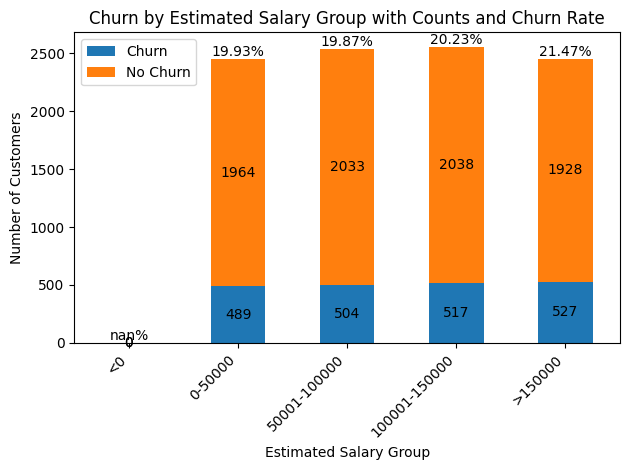

In [ ]:
# Calculate churn counts and rates for 'estimated_salary'
# Group estimated_salary into ranges for better visualization
bins = [-float('inf'), 0, 50000, 100000, 150000, float('inf')]
labels = ['<0', '0-50000', '50001-100000', '100001-150000', '>150000']
df['estimated_salary_group'] = pd.cut(df['estimated_salary'], bins=bins, labels=labels, right=False)

churn_counts = df.groupby('estimated_salary_group')['churn'].value_counts().unstack(fill_value=0)
churn_counts['Total'] = churn_counts.sum(axis=1)
churn_counts['Churn Rate'] = churn_counts[1] / churn_counts['Total']

# Rename columns
churn_counts = churn_counts.rename(columns={0: 'No Churn', 1: 'Churn'})

# Create the plot
plt.figure(figsize=(12, 6))
ax = churn_counts[['Churn', 'No Churn']].plot(kind='bar', stacked=True)

# Add annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center')

for index, rate in enumerate(churn_counts['Churn Rate']):
    ax.annotate(f'{rate:.2%}', (index, churn_counts.loc[churn_counts.index[index], 'Total']), ha='center', va='bottom')

plt.title('Churn by Estimated Salary Group with Counts and Churn Rate')
plt.xlabel('Estimated Salary Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(['Churn', 'No Churn'])
plt.tight_layout()
plt.show()

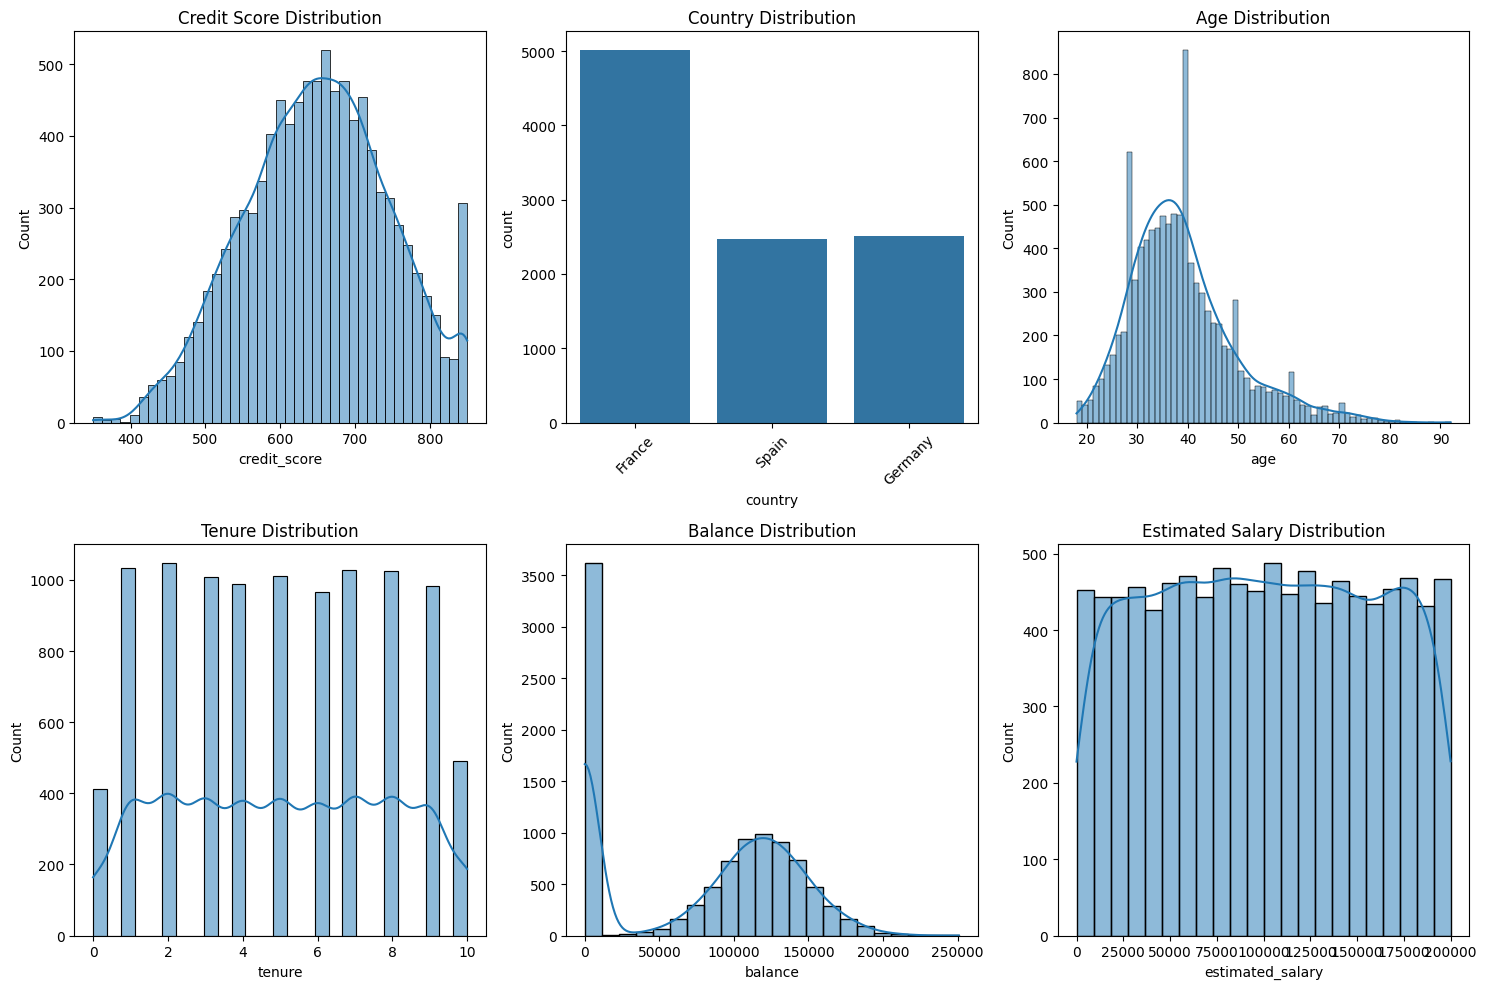

In [ ]:
# Create histograms for numerical features
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.histplot(df['credit_score'], kde=True)
plt.title('Credit Score Distribution')

plt.subplot(2, 3, 2)
sns.countplot(x='country', data=df)
plt.title('Country Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 4)
sns.histplot(df['tenure'], kde=True)
plt.title('Tenure Distribution')

plt.subplot(2, 3, 5)
sns.histplot(df['balance'], kde=True)
plt.title('Balance Distribution')

plt.subplot(2, 3, 6)
sns.histplot(df['estimated_salary'], kde=True)
plt.title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

**Summary:**
- Approximately 20.4% of customers have churn.
- Germany has the highest customer churn rate at 32.44%.
- Females have the highest customer churn rate at 25.07%.
- The older the age, the higher the customer churn rate.
- Inactive customers have a higher churn rate.

# 5 Feature Engineering

In [ ]:
# Create training data by excluding 'customer_id'
training_data = df_encoding.drop(columns=['customer_id'])

# Input the dependent variable
dependent_var = 'churn'

# Define the independent variables
independent_vars = training_data.columns.drop(dependent_var).tolist()
# Define the confidence interval
confidence_interval = 0.95
z_value = norm.ppf((1 + confidence_interval) / 2)
alpha = round(1 - confidence_interval, 3)

## 5.1 Correlation Coefficient

<Axes: >

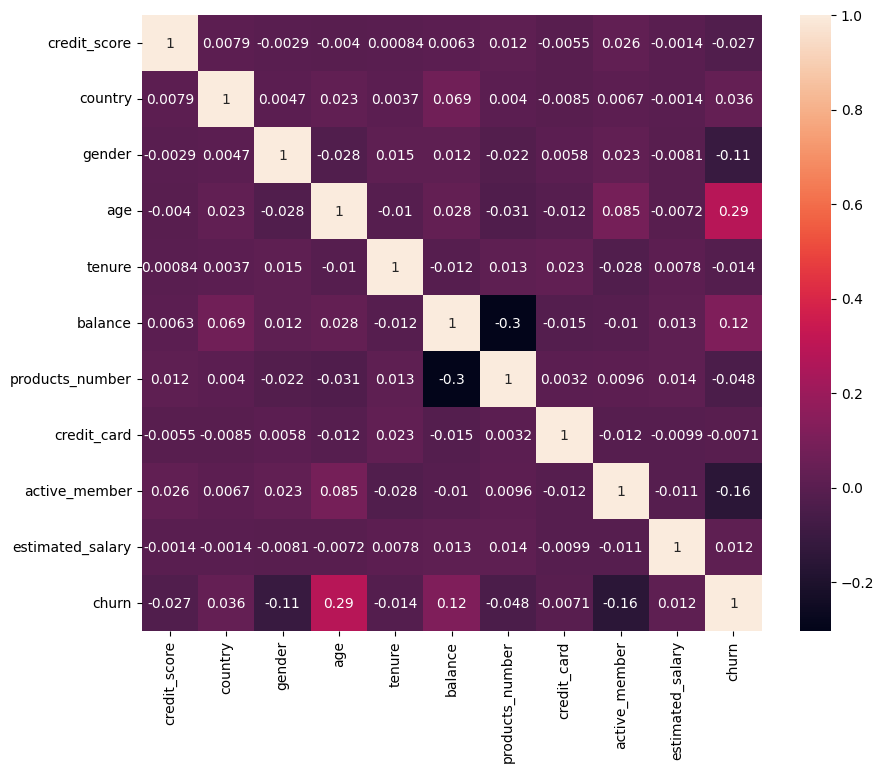

In [ ]:
# Calculate the correlation matrix
correlation_matrix = training_data.corr()

#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(10, 8))
sns.heatmap(training_data.corr(), fmt='.2g', annot=True)

## 5.2 Stepwise Selection

In [ ]:
def stepwise_selection(X, y, initial_list=[], threshold_in=0.05, threshold_out=0.05, verbose=True):
    included = list(initial_list)
    while True:
        changed = False
        # forward step
        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed = True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()  # null if pvalues is empty
        if worst_pval > threshold_out:
            changed = True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# Assuming 'training_data' and 'dependent_var' are defined as in the provided code
X = training_data[independent_vars]
y = training_data[dependent_var]

selected_features = stepwise_selection(X, y)

print("\nSelected features:")
print(selected_features)

#Train and evaluate models with different combinations of features
models = []
for i in range(1, len(selected_features) + 1):  # Iterate over different numbers of features
  features_subset = selected_features[:i]
  X_subset = X[features_subset]
  model = sm.Logit(y, sm.add_constant(X_subset)).fit(disp=0)
  models.append(model)
  predictions = model.predict(sm.add_constant(X_subset)) > 0.5
  accuracy = (predictions == y).mean()

  print(f"\nModel with {i} features:")
  print(model.summary()) #model summary
  print(f"Accuracy: {accuracy}") # print accuracy for model with i features

  #Optional: Confusion matrix and classification report for each model
  print(confusion_matrix(y,predictions))
  print(classification_report(y, predictions))

best_model_index = 0 # Initialize the index of the best model
best_accuracy = 0 # Initialize the accuracy of the best model

for i in range(len(models)):
  predictions = models[i].predict(sm.add_constant(X[selected_features[:i+1]])) > 0.5
  accuracy = (predictions == y).mean()
  if accuracy > best_accuracy:
    best_accuracy = accuracy
    best_model_index = i

print(f"\nBest Model: Model with {best_model_index + 1} features")
print(f"Features: {selected_features[:best_model_index+1]}")
print(f"Accuracy: {best_accuracy}")


Add  age                            with p-value 4.6581e-156
Add  active_member                  with p-value 2.04588e-82
Add  balance                        with p-value 5.36949e-30
Add  gender                         with p-value 8.18781e-24
Add  country                        with p-value 0.0110502
Add  credit_score                   with p-value 0.0169453

Selected features:
['age', 'active_member', 'balance', 'gender', 'country', 'credit_score']

Model with 1 features:
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                 0.07505
Time:                        13:48:19   Log-Likelihood:                -4675.5
converged:                       True   LL-Null

## 5.3 Feature Engineering

In [ ]:
# Create training data by excluding 'customer_id'
best_features = selected_features[:best_model_index+1]
table_data = training_data[best_features + [dependent_var]]

# Input the dependent variable
dependent_var = 'churn'

# Define the independent variables
independent_vars = table_data.columns.drop(dependent_var).tolist()
# Define the confidence interval
confidence_interval = 0.95
z_value = norm.ppf((1 + confidence_interval) / 2)
alpha = round(1 - confidence_interval, 3)

# 6 Binary Logistic Regression


Optimization terminated successfully.
         Current function value: 0.435218
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  churn   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Thu, 06 Mar 2025   Pseudo R-squ.:                  0.1390
Time:                        14:08:44   Log-Likelihood:                -4352.2
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                1.619e-300
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -3.6313      0.215    -16.910      0.000      -4.052      -3.210
age               0.

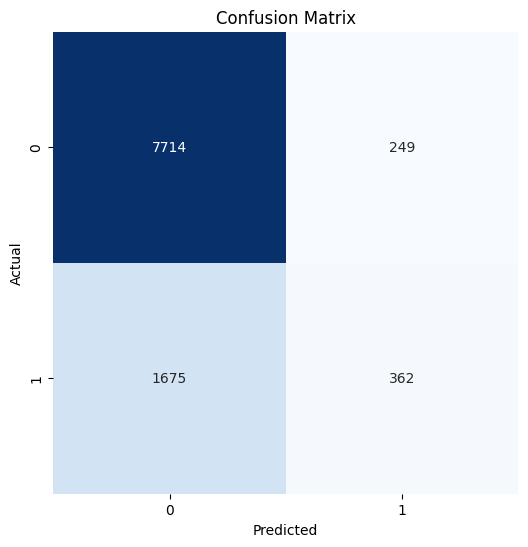

[[7714  249]
 [1675  362]]


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7963
           1       0.59      0.18      0.27      2037

    accuracy                           0.81     10000
   macro avg       0.71      0.57      0.58     10000
weighted avg       0.77      0.81      0.76     10000



ROC AUC: 0.7559


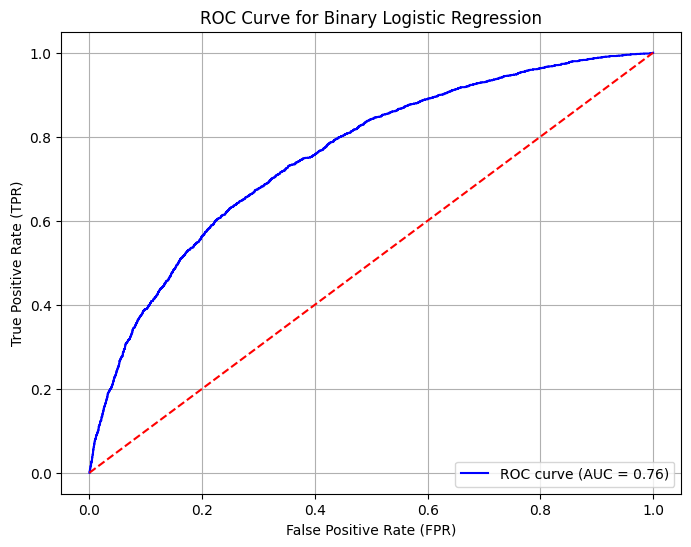

In [ ]:
formula=f"{dependent_var} ~ {' + '.join(independent_vars)}"
# Fit the binary logistic regression model using the 'method' argument
logit_model = smf.logit(formula, data=table_data).fit()

# Print the regression results
print(logit_model.summary())
print()

# Omnibus Test of Model Coefficients
ll_full = logit_model.llf  # Log-Likelihood of full model
ll_null = logit_model.llnull  # Log-Likelihood of null model
chi2_omnibus = -2 * (ll_null - ll_full)
df_omnibus = X.shape[1] - 1  # Degrees of freedom
p_value_omnibus = chi2.sf(chi2_omnibus, df_omnibus)
omnibus_test_of_model_coefficients = pd.DataFrame({
  'Chi-square': [f'{chi2_omnibus:.4f}'],
  'Degrees of Freedom': [f'{df_omnibus}'],
  'P-value': [f'{p_value_omnibus:.4e}']
})
print("Omnibus Test of Model Coefficients:")
print(omnibus_test_of_model_coefficients.to_string(index=False))
print()

# Model Summay
pseudo_r2 = 1 - (ll_full / ll_null) # Pseudo R-squared (McFadden)
model_summary = pd.DataFrame({
  'Pseudo R-squared (McFadden)': [f'{pseudo_r2:.4f}'],
  'Likelihood Ratio Test (LLR p-value)': [f'{logit_model.llr_pvalue}']
})
print('Model Summary:')
print(model_summary.to_string(index=False))
print()

# Wald Test for each variable
print("Wald Test for Variables:")
wald_test_for_each_variable = pd.DataFrame({
  'Wald Test for each variable': [logit_model.summary2().tables[1]] # Displays coefficients, p-values, etc.
})
print(wald_test_for_each_variable.to_string(index=False))
print()

print('Kiểm định Chi-Square:') #Kiểm định độ phù hợp tổng quát của mô hình
if p_value_omnibus < 0.05:
  p_value_omnibus_result = "The model is statistically significant (p < 0.05)."
else:
  p_value_omnibus_result = "The model is not statistically significant (p >= 0.05)."
chi_square_test = pd.DataFrame({
  'p_value_omnibus': [p_value_omnibus], # Displays coefficients, p-values, etc.
  'p_value_omnibus_result': [p_value_omnibus_result]
})
print(chi_square_test.to_string(index=False))
print()

print('Kiểm định Pseudo R-squared:')
if pseudo_r2 > 0.2:
  pseudo_r2_result = "Pseudo R-squared indicates a reasonable fit."
else:
  pseudo_r2_result = "Pseudo R-squared indicates a weak fit."
pseudo_r_squared = pd.DataFrame({
  'pseudo_r2': [pseudo_r2], # Displays coefficients, p-values, etc.
  'pseudo_r2_result': [pseudo_r2_result]
})
print(pseudo_r_squared.to_string(index=False))
print()

print('Kiểm định Likelihood Ratio Test (LLR p-value):')
if logit_model.llr_pvalue < 0.05:
  pvalue_llr_result = "The model is statistically significant (p < 0.05)."
else:
  pvalue_llr_result = "The model is not statistically significant (p >= 0.05)."
pvalue_llr = pd.DataFrame({
  'llr_pvalue': [logit_model.llr_pvalue],
  'pvalue_llr_result': [pvalue_llr_result]
})
print(pvalue_llr.to_string(index=False))
print()

print('Kiểm định Wald về ý nghĩa của các hệ số hồi quy:')
wald_test_results = logit_model.summary2().tables[1]
significant_vars = []
non_significant_vars = []
for var, p_value in zip(independent_vars, wald_test_results['P>|z|']):
    if p_value < alpha:
        significant_vars.append(var)
    else:
        non_significant_vars.append(var)
wald_test_results = pd.DataFrame({
  'wald_test_result': [f'Significant variables: {", ".join(significant_vars)} AND Non-significant variables: {", ".join(non_significant_vars)}']
})
print(wald_test_results.to_string(index=False))
print()

# Kiểm tra nếu có điểm nào không đạt yêu cầu
if p_value_omnibus_result != 'The model is statistically significant (p < 0.05).' or pseudo_r2_result != "Pseudo R-squared indicates a reasonable fit." or pvalue_llr_result != "The model is statistically significant (p < 0.05)." or f'{", ".join(non_significant_vars)}' != '':
  conclusion = "Should Optimized Model"
else:
  conclusion = "Model Meets Requirements"
print('Đánh giá tổng hợp:')
print(conclusion)
print()

# Tạo bảng hypothesis_test
hypothesis_test = pd.DataFrame({
  'Kiểm định Chi-Square': [p_value_omnibus_result],
  'Kiểm định Pseudo R-squared': [pseudo_r2_result],
  'Kiểm định Likelihood Ratio Test (LLR p-value)': [pvalue_llr_result],
  'Kiểm định Wald về ý nghĩa của các hệ số hồi quy': [wald_test_results],
  'Conclusion': [conclusion]
})
hypothesis_test = hypothesis_test.melt(var_name='Test', value_name='Result')

# Lấy hệ số từ mô hình
coefficients = logit_model.params
# Phương trình hồi quy
terms = []
for var, coef in coefficients.items():
    if var == 'intercept':
        terms.append(f"{coef:.4f}")
    else:
        terms.append(f"{coef:.4f} * {var}")

equation = "log(p / (1 - p)) = " + " + ".join(terms)
equation_fuction = pd.DataFrame({
  'equation': [equation]
})
print("Phương trình hồi quy logistic:")
print(equation)
print()

# Confusion Matrix and Classification Report
threshold = 0.5
predictions = (logit_model.predict(table_data[independent_vars]) >= threshold).astype(int)
conf_matrix = confusion_matrix(table_data[dependent_var], predictions)
print("Confusion Matrix")
# Generate classification plot
y_pred = logit_model.predict(table_data[independent_vars])
y_pred_class = [1 if prob >= 0.5 else 0 for prob in y_pred]
cm = confusion_matrix(table_data[dependent_var], y_pred_class)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
print(conf_matrix)
print()

print("\nClassification Report")
print(classification_report(table_data[dependent_var], predictions))
print()

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(table_data[dependent_var], logit_model.predict(table_data[independent_vars]))
roc_auc = auc(fpr, tpr)
print(f"\nROC AUC: {roc_auc:.4f}")
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.title("ROC Curve for Binary Logistic Regression")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 7 Prediction

In [ ]:
# Input values for prediction
input_value = pd.DataFrame({
    'age': [35],
    'active_member': [1],
    'balance': [120000],
    'gender': ['Female'],
    'country': ['France'],
    'credit_score': [1]
})

# Replace with your actual mappings from df_encoding)
gender_mapping = {'Female': 0, 'Male': 1}
country_mapping = {'France': 2, 'Spain': 1, 'Germany': 0}


# Apply the mappings to the input DataFrame
input_value['gender'] = input_value['gender'].map(gender_mapping)
input_value['country'] = input_value['country'].map(country_mapping)

# Predict probabilities
probabilities = logit_model.predict(input_value)
print(f"Predicted probabilities (%):")
print(f'{probabilities*100}')
print()

# Predict classes (0 or 1) based on a threshold (e.g. 0.5)
threshold = 0.5
predicted_classes = (probabilities >= threshold).astype(int)
print(f"Predicted classes:")
print(predicted_classes)

Predicted probabilities (%):
0    20.038242
dtype: float64

Predicted classes:
0    0
dtype: int64
